In [1]:
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.tools import job_monitor

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

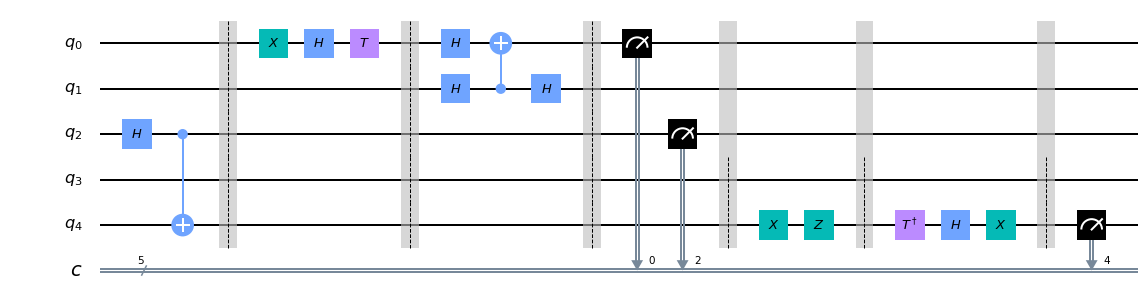

In [2]:
def entangle(c, q1, q2):
    c.h(q1)
    c.cx(q1, q2)
    return c

def entangle_payload(c, q1, q2):
    c.h([q1, q2])
    c.cx(q2,q1)
    c.h(q2)
    return c

def recive(c, q):
    c.x(q)
    c.z(q)
    return c

q = QuantumCircuit(5,5)
q = entangle(q, 2, 4)

q.barrier()
#payload
q.x(0)
q.h(0)
q.t(0)

q.barrier()
q = entangle_payload(q, 0, 1)

q.barrier()
q.measure([0,2], [0,2])

q.barrier([3,4])
q = recive(q, 4)

#validate
q.barrier([3,4])
q.tdg(4)
q.h(4)
q.x(4)
q.barrier([3,4])
q.measure(4, 4)

q.draw(output="mpl")

In [ ]:
provider = IBMQ.get_provider("ibm-q")
backend = provider.get_backend("ibmqx2")
job = execute(q, backend=backend, shots=500)
job_monitor(job)

Job Status: job is queued (272)   

In [ ]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(q)

plot_histogram([counts])